In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load noise

In [2]:
LoadDA = pd.read_csv("./Processed Data/Load_C.csv")[['1','2','3','4','5','6','7']]
load_column_names = ['region1_load', 'region2_load', 'region3_load','region4_load', 'region5_load', 'region6_load', 'region7_load']
LoadDA.columns = load_column_names
new_index = np.arange(LoadDA.index.min(), LoadDA.index.max() + 1, 1/12)
LoadDA_reindexed = LoadDA.reindex(new_index).reset_index(drop=True)
LoadDA_interpolated = LoadDA_reindexed.interpolate(method='linear')

In [4]:
LoadRT = pd.read_csv("./Processed Data/realtimeload_C_fixed.csv",header=None,usecols=[1, 2, 3])
load_column_names_rt = ['region1_load', 'region2_load', 'region3_load']
LoadRT.columns = load_column_names_rt

In [6]:
# Create the new DataFrame
load_train_list = []
    
for i in range(0,3):
    # Calculate max of LoadDA
    mean_LoadDA = LoadDA.mean()[i]

    for j in range(288, len(LoadRT)):
        da_window = LoadDA.iloc[int(j/12)-24:int(j/12),i].values
        rt_window = LoadRT.iloc[j-12:j,i].values
        current_load = LoadRT.iloc[j,i]
        new_row = np.concatenate((da_window, rt_window, [mean_LoadDA], [current_load]))
        load_train_list.append(new_row)

load_train = pd.DataFrame(load_train_list, columns=[f'DA{j+1}' for j in range(24)] + [f'RT{j+1}' for j in range(12)] + ['Mean', 'y'])

In [7]:
# Selecting features and target variables
X_load = load_train.iloc[:,0:37]
y_load = load_train.iloc[:,37]

# Splitting the data
X_load_train, X_load_test, y_load_train, y_load_test = train_test_split(X_load, y_load, test_size=0.2, random_state=42)

# Training the model
load_model = LinearRegression()
load_model.fit(X_load_train, y_load_train)

# Predicting
load_predictions = load_model.predict(X_load_test)

# Evaluation
load_mae = mean_absolute_error(y_load_test, load_predictions)
print(f"Mean Absolute Error: {load_mae}")

Mean Absolute Error: 74.65161785028772


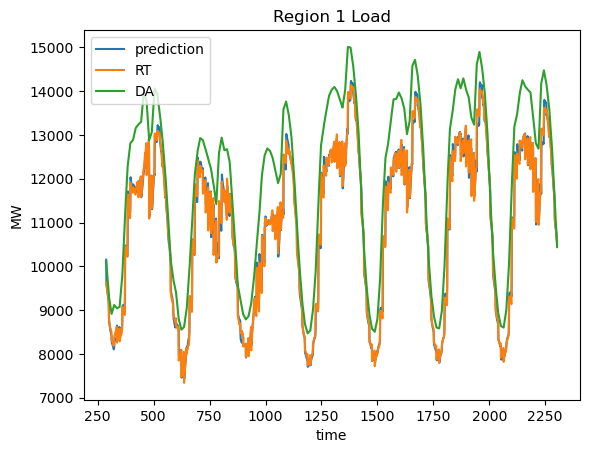

In [8]:
test_load_predictions = load_model.predict(X_load)

a = 288
b = 2304

x = np.arange(a, b, 1)  # Common x-axis values for both lines
ya = test_load_predictions[a-288:b-288]  # First set of y-axis values
yb = LoadRT['region1_load'][a:b]  # Second set of y-axis values
yc = LoadDA_interpolated['region1_load'][a:b]  # Second set of y-axis values


# Create the plot
plt.plot(x, ya, label='prediction')  # Plot the first line
plt.plot(x, yb, label='RT')  # Plot the second line
plt.plot(x, yc, label='DA')  # Plot the thrid line


# Adding labels and title
plt.xlabel('time')  # Replace with your X-axis label
plt.ylabel('MW')  # Replace with your Y-axis label
plt.title('Region 1 Load')  # Replace with your plot title

# Adding a legend
plt.legend()

# Show the plot
plt.show()

In [9]:
load_predictions_df = pd.DataFrame(np.nan, index=range(105408), columns=range(7))

for i in range(3,7):
    # Calculate max of LoadDA
    mean_LoadDA = LoadDA.mean()[i]
    rt_window = LoadDA_interpolated.iloc[276:288,i].values

    for j in range(288, len(LoadRT)):
        da_window = LoadDA.iloc[int(j/12)-24:int(j/12),i].values
        new_test = np.concatenate((da_window, rt_window, [mean_LoadDA])).reshape(1, -1)
        prediction = load_model.predict(new_test)
        load_predictions_df.iloc[j, i] = prediction
        rt_window = np.concatenate((rt_window[1:12],prediction))

/Users/ningkunzheng/opt/anaconda3/envs/STESTS/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/ningkunzheng/opt/anaconda3/envs/STESTS/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/ningkunzheng/opt/anaconda3/envs/STESTS/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/ningkunzheng/opt/anaconda3/envs/STESTS/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/ningkunzheng/opt/anaconda3/envs/STESTS/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

/Users/ningkunzheng/opt/anaconda3/envs/STESTS/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/ningkunzheng/opt/anaconda3/envs/STESTS/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/ningkunzheng/opt/anaconda3/envs/STESTS/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/ningkunzheng/opt/anacon

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
load_predictions_df

0   1   2             3             4             5            6
0      NaN NaN NaN           NaN           NaN           NaN          NaN
1      NaN NaN NaN           NaN           NaN           NaN          NaN
2      NaN NaN NaN           NaN           NaN           NaN          NaN
3      NaN NaN NaN           NaN           NaN           NaN          NaN
4      NaN NaN NaN           NaN           NaN           NaN          NaN
...     ..  ..  ..           ...           ...           ...          ...
105403 NaN NaN NaN  30999.248549  17357.040205  11656.606866  1583.483161
105404 NaN NaN NaN  30847.894703  17269.858876  11607.261725  1578.082925
105405 NaN NaN NaN  30710.897132  17187.045023  11563.571540  1573.716150
105406 NaN NaN NaN  30589.562995  17110.433861  11526.487541  1570.395948
105407 NaN NaN NaN  30482.096513  17041.577327  11495.819567  1567.908033

[105408 rows x 7 columns]

In [11]:
load_predictions_df.columns = load_column_names
load_predictions_df[['region1_load','region2_load','region3_load']] = LoadRT[['region1_load','region2_load','region3_load']]
load_predictions_df.loc[0:288, ['region4_load','region5_load','region6_load','region7_load']] = LoadDA_interpolated.loc[0:288, ['region4_load','region5_load','region6_load','region7_load']]

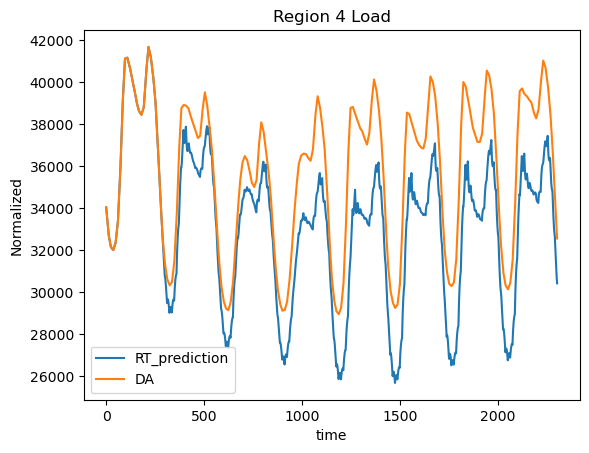

In [12]:
a = 0
b = 2304

x = np.arange(a, b, 1)  # Common x-axis values for both lines
ya = load_predictions_df['region4_load'][a:b]  # First set of y-axis values
yb = LoadDA_interpolated['region4_load'][a:b]  # Second set of y-axis values

# Create the plot
plt.plot(x, ya, label='RT_prediction')  # Plot the first line
plt.plot(x, yb, label='DA')  # Plot the second line

# Adding labels and title
plt.xlabel('time')  # Replace with your X-axis label
plt.ylabel('Normalized')  # Replace with your Y-axis label
plt.title('Region 4 Load')  # Replace with your plot title

# Adding a legend
plt.legend()

# Show the plot
plt.show()

In [13]:
load_predictions_df

region1_load  region2_load  region3_load  region4_load  region5_load  \
0        9891.033801  11092.131987   1919.617920  34050.217125  17591.410692   
1        9852.053801  11037.921987   1913.447920  33943.551543  17554.565009   
2        9809.843801  10984.871987   1904.327920  33836.885960  17517.719325   
3        9763.793801  11085.201987   1888.597920  33730.220377  17480.873642   
4        9735.053801  11029.741987   1879.357920  33623.554795  17444.027959   
...              ...           ...           ...           ...           ...   
105403  11729.444633  13441.940030   2475.436656  30999.248549  17357.040205   
105404  11679.184633  13374.670030   2464.516656  30847.894703  17269.858876   
105405  11617.614633  13265.140030   2450.606656  30710.897132  17187.045023   
105406  11564.434633  13200.970030   2440.566656  30589.562995  17110.433861   
105407  11517.924633  13140.900030   2432.086656  30482.096513  17041.577327   

        region6_load  region7_load  
0       10963.245568   1482.638247  
1       10940.150267   1477.565291  
2       10917.054966   1472.492335  
3       10893.959664   1467.419378  
4       10870.864363   1462.346422  
...              ...           ...  
105403  11656.606866   1583.483161  
105404  11607.261725   1578.082925  
105405  11563.571540   1573.716150  
105406  11526.487541   1570.395948  
105407  11495.819567   1567.908033  

[105408 rows x 7 columns]

In [14]:
load_predictions_df.to_csv('Processed Data/realtimeload_all.csv', header=False, index=False)

In [ ]:
repeated_index = np.repeat(LoadDA.index, 12)
repeated_loadDA = LoadDA.loc[repeated_index].reset_index(drop=True)
LoadMAE = mean_absolute_error(repeated_loadDA, load_predictions_df)
LoadMAPE = mean_absolute_percentage_error(load_predictions_df, repeated_loadDA)
AdjustedEDL = pd.read_csv("./AdjustedEDL.csv")
AdjustedEDL.columns = load_column_names
AdjustedLoadMAE = mean_absolute_error(repeated_loadDA, AdjustedEDL)
AdjustedLoadMAPE = mean_absolute_percentage_error(AdjustedEDL, repeated_loadDA)
print("Load MAE %s MAPE %s; Adjusted load MAE %s MAPE %s" % (LoadMAE, LoadMAPE, AdjustedLoadMAE, AdjustedLoadMAPE))


### Solar noise

In [ ]:
SolarDA = pd.read_csv("./Processed Data/SolarZone_C.csv")[['0','1','2','3','4','5','6']]
solar_column_names = ['region1_solar', 'region2_solar', 'region3_solar','region4_solar', 'region5_solar', 'region6_solar', 'region7_solar']
SolarDA.columns = solar_column_names
new_index = np.arange(SolarDA.index.min(), SolarDA.index.max() + 1, 1/12)
SolarDA_reindexed = SolarDA.reindex(new_index).reset_index(drop=True)
SolarDA_interpolated = SolarDA_reindexed.interpolate(method='linear')

In [ ]:
SolarRT = pd.read_csv("./Processed Data/realtimesolar123.csv",header=None,usecols=[0, 1, 2])
solar_column_names_rt = ['region1_solar', 'region2_solar', 'region3_solar']
SolarRT.columns = solar_column_names_rt

In [ ]:
# Create the new DataFrame
solar_train_list = []
    
for i in range(0,3):
    # Calculate max of LoadDA
    mean_SolarDA = SolarDA.mean()[i]

    for j in range(288, len(SolarRT)):
        da_window = SolarDA.iloc[int(j/12)-24:int(j/12),i].values
        rt_window = SolarRT.iloc[j-12:j,i].values
        current_solar = SolarRT.iloc[j,i]
        new_row = np.concatenate((da_window, rt_window, [mean_SolarDA], [current_solar]))
        solar_train_list.append(new_row)

solar_train = pd.DataFrame(solar_train_list, columns=[f'DA{j+1}' for j in range(24)] + [f'RT{j+1}' for j in range(12)] + ['Mean', 'y'])

In [ ]:
# Selecting features and target variables
X_solar = solar_train.iloc[:,0:37]
y_solar = solar_train.iloc[:,37]

# Splitting the data
X_solar_train, X_solar_test, y_solar_train, y_solar_test = train_test_split(X_solar, y_solar, test_size=0.2, random_state=42)

# Training the model
solar_model = LinearRegression()
solar_model.fit(X_solar_train, y_solar_train)

# Predicting
solar_predictions = solar_model.predict(X_solar_test)

# Evaluation
solar_mae = mean_absolute_error(y_solar_test, solar_predictions)
print(f"Mean Absolute Error: {solar_mae}")

In [ ]:
test_solar_predictions = solar_model.predict(X_solar)

a = 288
b = 2304

x = np.arange(a, b, 1)  # Common x-axis values for both lines
ya = test_solar_predictions[a-288:b-288]  # First set of y-axis values
yb = SolarRT['region1_solar'][a:b]  # Second set of y-axis values
yc = SolarDA_interpolated['region1_solar'][a:b]  # Second set of y-axis values


# Create the plot
plt.plot(x, ya, label='prediction')  # Plot the first line
plt.plot(x, yb, label='RT')  # Plot the second line
plt.plot(x, yc, label='DA')  # Plot the thrid line


# Adding labels and title
plt.xlabel('time')  # Replace with your X-axis label
plt.ylabel('MW')  # Replace with your Y-axis label
plt.title('Region 1 Solar')  # Replace with your plot title

# Adding a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
solar_predictions_df = pd.DataFrame(np.nan, index=range(105408), columns=range(7))

for i in range(3,7):
    # Calculate max of SolarDA
    mean_SolarDA = SolarDA.mean()[i]
    rt_window = SolarDA_interpolated.iloc[276:288,i].values

    for j in range(288, len(SolarRT)):
        da_window = SolarDA.iloc[int(j/12)-24:int(j/12),i].values
        new_test = np.concatenate((da_window, rt_window, [mean_SolarDA])).reshape(1, -1)
        prediction = solar_model.predict(new_test)
        solar_predictions_df.iloc[j, i] = prediction
        rt_window = np.concatenate((rt_window[1:12],prediction))

In [ ]:
solar_predictions_df.columns = solar_column_names
solar_predictions_df[['region1_solar','region2_solar','region3_solar']] = SolarRT[['region1_solar','region2_solar','region3_solar']]
solar_predictions_df.loc[0:288, ['region4_solar','region5_solar','region6_solar','region7_solar']] = SolarDA_interpolated.loc[0:288, ['region4_solar','region5_solar','region6_solar','region7_solar']]

In [ ]:
solar_predictions_df[(solar_predictions_df < 0) | (SolarDA_interpolated<=1)] = 0

In [ ]:
a = 0
b = 2304

x = np.arange(a, b, 1)  # Common x-axis values for both lines
ya = solar_predictions_df['region5_solar'][a:b]  # First set of y-axis values
yb = SolarDA_interpolated['region5_solar'][a:b]  # Second set of y-axis values

# Create the plot
plt.plot(x, ya, label='RT_prediction')  # Plot the first line
plt.plot(x, yb, label='DA')  # Plot the second line

# Adding labels and title
plt.xlabel('time')  # Replace with your X-axis label
plt.ylabel('MW')  # Replace with your Y-axis label
plt.title('Region 4 Solar')  # Replace with your plot title

# Adding a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
solar_predictions_df.to_csv('Processed Data/realtimesolar_all.csv', header=False, index=False)

In [ ]:
repeated_index = np.repeat(SolarDA.index, 12)
repeated_solarDA = SolarDA.loc[repeated_index].reset_index(drop=True)
SolarMAE = mean_absolute_error(repeated_solarDA, solar_predictions_df)
SolarMAPE = ((repeated_solarDA - solar_predictions_df).abs() / solar_predictions_df.max()).mean().mean()
AdjustedSolar = pd.read_csv("./AdjustedEDSolar.csv")
AdjustedSolar.columns = solar_column_names
AdjustedSolarMAE = mean_absolute_error(repeated_solarDA, AdjustedSolar)
AdjustedSolarMAPE = ((repeated_solarDA - AdjustedSolar).abs() / AdjustedSolar.max()).mean().mean()
print("Solar MAE %s MAPE %s; Adjusted solar MAE %s MAPE %s" % (SolarMAE, SolarMAPE, AdjustedSolarMAE, AdjustedSolarMAPE))

### Wind noise

In [ ]:
WindDA = pd.read_csv("./Processed Data/WindZone_C.csv")[['0','1','2','3','4','5','6']]
wind_column_names = ['region1_wind', 'region2_wind', 'region3_wind','region4_wind', 'region5_wind', 'region6_wind', 'region7_wind']
WindDA.columns = wind_column_names
new_index = np.arange(WindDA.index.min(), WindDA.index.max() + 1, 1/12)
WindDA_reindexed = WindDA.reindex(new_index).reset_index(drop=True)
WindDA_interpolated = WindDA_reindexed.interpolate(method='linear')

In [ ]:
WindRT = pd.read_csv("./Processed Data/realtimewind123.csv",header=None,usecols=[0, 1, 2])
wind_column_names_rt = ['region1_wind', 'region2_wind', 'region3_wind']
WindRT.columns = wind_column_names_rt

In [ ]:
# Create the new DataFrame
wind_train_list = []
    
for i in range(0,3):
    # Calculate mean of WindDA
    mean_WindDA = WindDA.mean()[i]

    for j in range(288, len(WindRT)):
        da_window = WindDA.iloc[int(j/12)-24:int(j/12),i].values
        rt_window = WindRT.iloc[j-12:j,i].values
        current_wind = WindRT.iloc[j,i]
        new_row = np.concatenate((da_window, rt_window, [mean_WindDA], [current_wind]))
        wind_train_list.append(new_row)

wind_train = pd.DataFrame(wind_train_list, columns=[f'DA{j+1}' for j in range(24)] + [f'RT{j+1}' for j in range(12)] + ['Mean', 'y'])

In [ ]:
# Selecting features and target variables
X_wind = wind_train.iloc[:,0:37]
y_wind = wind_train.iloc[:,37]

# Splitting the data
X_wind_train, X_wind_test, y_wind_train, y_wind_test = train_test_split(X_wind, y_wind, test_size=0.2, random_state=42)

# Training the model
wind_model = LinearRegression()
wind_model.fit(X_wind_train, y_wind_train)

# Predicting
wind_predictions = wind_model.predict(X_wind_test)

# Evaluation
wind_mae = mean_absolute_error(y_wind_test, wind_predictions)
print(f"Mean Absolute Error: {wind_mae}")

In [ ]:
test_wind_predictions = wind_model.predict(X_wind)

a = 288
b = 2304

x = np.arange(a, b, 1)  # Common x-axis values for both lines
ya = test_wind_predictions[a-288:b-288]  # First set of y-axis values
yb = WindRT['region1_wind'][a:b]  # Second set of y-axis values
yc = WindDA_interpolated['region1_wind'][a:b]  # Second set of y-axis values


# Create the plot
# plt.plot(x, ya, label='prediction')  # Plot the first line
plt.plot(x, yb, label='RT')  # Plot the second line
plt.plot(x, yc, label='DA')  # Plot the thrid line


# Adding labels and title
plt.xlabel('time')  # Replace with your X-axis label
plt.ylabel('MW')  # Replace with your Y-axis label
plt.title('Region 1 Wind')  # Replace with your plot title

# Adding a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
wind_predictions_df = pd.DataFrame(np.nan, index=range(105408), columns=range(7))

for i in range(3,7):
    # Calculate mean of WindDA
    mean_WindDA = WindDA.mean()[i]
    rt_window = WindDA_interpolated.iloc[276:288,i].values

    for j in range(288, len(WindRT)):
        da_window = WindDA.iloc[int(j/12)-24:int(j/12),i].values
        new_test = np.concatenate((da_window, rt_window, [mean_WindDA])).reshape(1, -1)
        prediction = wind_model.predict(new_test)
        wind_predictions_df.iloc[j, i] = prediction
        rt_window = np.concatenate((rt_window[1:12],prediction))

In [ ]:
wind_predictions_df.columns = wind_column_names
wind_predictions_df[['region1_wind','region2_wind','region3_wind']] = WindRT[['region1_wind','region2_wind','region3_wind']]
wind_predictions_df.loc[0:288, ['region4_wind','region5_wind','region6_wind','region7_wind']] = WindDA_interpolated.loc[0:288, ['region4_wind','region5_wind','region6_wind','region7_wind']]

In [ ]:
a = 0
b = 2304

x = np.arange(a, b, 1)  # Common x-axis values for both lines
ya = wind_predictions_df['region4_wind'][a:b]  # First set of y-axis values
yb = WindDA_interpolated['region4_wind'][a:b]  # Second set of y-axis values

# Create the plot
plt.plot(x, ya, label='RT_prediction')  # Plot the first line
plt.plot(x, yb, label='DA')  # Plot the second line

# Adding labels and title
plt.xlabel('time')  # Replace with your X-axis label
plt.ylabel('MW')  # Replace with your Y-axis label
plt.title('Region 4 Wind')  # Replace with your plot title

# Adding a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
wind_predictions_df.to_csv('Processed Data/realtimewind_all.csv', header=False, index=False)

In [ ]:
repeated_index = np.repeat(WindDA.index, 12)
repeated_windDA = WindDA.loc[repeated_index].reset_index(drop=True)
WindMAE = mean_absolute_error(repeated_windDA, wind_predictions_df)
WindMAPE = ((repeated_windDA - wind_predictions_df).abs() / wind_predictions_df.max()).mean().mean()
AdjustedWind = pd.read_csv("./AdjustedEDWind.csv")
AdjustedWind.columns = wind_column_names
AdjustedWindMAE = mean_absolute_error(repeated_windDA, AdjustedWind)
AdjustedWindMAPE = ((repeated_windDA - AdjustedWind).abs() / AdjustedWind.max()).mean().mean()
print("Wind MAE %s MAPE %s; Adjusted wind MAE %s MAPE %s" % (WindMAE, WindMAPE, AdjustedWindMAE, AdjustedWindMAPE))

In [ ]:
AdjustedWind.max()

In [ ]:
(repeated_windDA - AdjustedWind).abs().iloc[:,0:3]

In [ ]:
AdjustedWindmax=[4221.94,6207.26,1092.7,15170.48,14470.39,4524.39,40]

### other methods

In [ ]:
Train = pd.concat([LoadDA, SolarDA, WindTrain], axis=1)
new_index = np.arange(Train.index.min(), Train.index.max() + 1, 1/12)
Train_reindexed = Train.reindex(new_index)
Train_interpolated = Train_reindexed.interpolate(method='linear')
Train_interpolated['timestamp'] = timestamp = pd.date_range(start='2021-01-01', end='2022-01-02', freq='5T')[:-1]
Train_interpolated.set_index('timestamp', inplace=True)

In [ ]:
max_LoadDA

In [ ]:
Train

In [ ]:
Test = pd.concat([LoadRT, SolarRT, WindRT], axis=1)


In [ ]:
# Selecting features and target variables
X = Train[['region1_load', 'region2_load', 'region3_load','region1_solar', 'region2_solar', 'region3_solar','region1_wind', 'region2_wind', 'region3_wind']]  # predictor regions
y = Train[['region4_load', 'region5_load', 'region6_load', 'region7_load','region4_solar', 'region5_solar', 'region6_solar', 'region7_solar','region4_wind', 'region5_wind', 'region6_wind', 'region7_wind']]  # target regions

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting
predictions = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")

In [ ]:
predictions

In [ ]:
predictions_4_7 = model.predict(Test)


In [ ]:
Load = pd.read_csv("./Processed Data/realtimeload_C_fixed.csv",header=None)
Solar = pd.read_csv("./Processed Data/realtimesolar123.csv",header=None)
Wind = pd.read_csv("./Processed Data/realtimewind123.csv",header=None)


In [ ]:
x = np.arange(0, 288, 1)  # Common x-axis values for both lines
ya = predictions_4_7[:,8][0:288]  # First set of y-axis values
yb = Wind[3][0:288]  # Second set of y-axis values

# Create the plot
plt.plot(x, ya, label='prediction')  # Plot the first line
plt.plot(x, yb, label='real')  # Plot the second line

# Adding labels and title
plt.xlabel('time')  # Replace with your X-axis label
plt.ylabel('MW')  # Replace with your Y-axis label
plt.title('Region 4 Wind')  # Replace with your plot title

# Adding a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
import numpy as np


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Train_interpolated_scaled = pd.DataFrame(scaler.fit_transform(Train_interpolated), columns=Train_interpolated.columns)


In [ ]:
X_LSTM = Train_interpolated_scaled[['region1_load', 'region2_load', 'region3_load','region1_solar', 'region2_solar', 'region3_solar','region1_wind', 'region2_wind', 'region3_wind']]  # predictor regions
y_LSTM = Train_interpolated_scaled[['region4_load', 'region5_load', 'region6_load', 'region7_load','region4_solar', 'region5_solar', 'region6_solar', 'region7_solar','region4_wind', 'region5_wind', 'region6_wind', 'region7_wind']]  # target regions

In [ ]:
reshaped_X_LSTM = X_LSTM.values.reshape(366, 288, 9)
reshaped_y_LSTM = y_LSTM.values.reshape(366, 288, 12)

In [ ]:
# Assuming input_data and output_data are your datasets


# input_data.shape -> (number_of_samples, 288, 9) for three input time series
# output_data.shape -> (number_of_samples, 288, 12) for four output time series

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(288, 9)))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(Dense(12, activation='relu'))

adam_optimizer = Adam(learning_rate=0.001) 

model.compile(optimizer=adam_optimizer, loss='mse')

# Fit the model
model.fit(reshaped_X_LSTM, reshaped_y_LSTM, epochs=50, batch_size=32)

# Predict and evaluate
# predicted_output = model.predict(input_test_data)

In [ ]:
Test_scaled = pd.DataFrame(scaler.fit_transform(Test), columns=Test.columns)

In [ ]:
predicted_output = model.predict(Test_scaled.values.reshape(366, 288, 9))

In [ ]:
predicted_output.shape

In [ ]:
x = np.arange(0, 288, 1)  # Common x-axis values for both lines
ya = predicted_output[0,:,8]  # First set of y-axis values
yb = Train_interpolated_scaled['region4_wind'][0:288]  # Second set of y-axis values

# Create the plot
plt.plot(x, ya, label='prediction')  # Plot the first line
plt.plot(x, yb, label='real')  # Plot the second line

# Adding labels and title
plt.xlabel('time')  # Replace with your X-axis label
plt.ylabel('Normalized')  # Replace with your Y-axis label
plt.title('Region 4 Wind')  # Replace with your plot title

# Adding a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
reshaped_X_LSTM_Load = reshaped_X_LSTM[:,:,0:3]
reshaped_y_LSTM_Load = reshaped_y_LSTM[:,:,0:4]

In [ ]:
model_load = Sequential()
model_load.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(288, 3)))
model_load.add(LSTM(50, activation='relu', return_sequences=True))
model_load.add(Dense(4, activation='relu'))

adam_optimizer = Adam(learning_rate=0.001) 

model_load.compile(optimizer=adam_optimizer, loss='mse')

# Fit the model
model_load.fit(reshaped_X_LSTM_Load, reshaped_y_LSTM_Load, epochs=50, batch_size=32)

In [ ]:
predicted_output_load = model_load.predict(Test_scaled.values.reshape(366, 288, 9)[:,:,0:3])

In [ ]:
predicted_output_load[0,:,0]

In [ ]:
x = np.arange(0, 288, 1)  # Common x-axis values for both lines
ya = predicted_output_load[0,:,0]  # First set of y-axis values
yb = Train_interpolated_scaled['region4_load'][0:288]  # Second set of y-axis values

# Create the plot
plt.plot(x, ya, label='prediction')  # Plot the first line
plt.plot(x, yb, label='real')  # Plot the second line

# Adding labels and title
plt.xlabel('time')  # Replace with your X-axis label
plt.ylabel('MW')  # Replace with your Y-axis label
plt.title('CAISO')  # Replace with your plot title

# Adding a legend
plt.legend()

# Show the plot
plt.show()